In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.15.0


In [2]:
# Teksto duomenys
text = """
Once upon a time, there was a little girl named Red Riding Hood. She lived with her mother in a village near the forest.
One day, her mother asked her to take a basket of goodies to her grandmother, who lived on the other side of the forest.
Remember, go straight to Grandma's house, her mother cautioned. Don't dawdle along the way and please don't talk to strangers!
The woods are dangerous.
"""

# Duomenų paruošimas
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in text.split("\n"):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Padavimas ir etikečių paruošimas
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

print("Total words:", total_words)
print("Input shape:", X.shape)
print("Output shape:", y.shape)


Total words: 53
Input shape: (68, 23)
Output shape: (68, 53)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Sukurti modelį
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 23, 10)            530       
                                                                 
 lstm (LSTM)                 (None, 100)               44400     
                                                                 
 dense (Dense)               (None, 53)                5353      
                                                                 
Total params: 50283 (196.42 KB)
Trainable params: 50283 (196.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
history = model.fit(X, y, epochs=100, verbose=1)


Epoch 1/100
3/3 [==============================] - 3s 22ms/step - loss: 3.9707 - accuracy: 0.0147
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 3.9660 - accuracy: 0.0588
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 3.9628 - accuracy: 0.0735
Epoch 4/100
3/3 [==============================] - 0s 25ms/step - loss: 3.9591 - accuracy: 0.0882
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 3.9546 - accuracy: 0.0588
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 3.9486 - accuracy: 0.0735
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 3.9410 - accuracy: 0.1029
Epoch 8/100
3/3 [==============================] - 0s 24ms/step - loss: 3.9247 - accuracy: 0.0588
Epoch 9/100
3/3 [==============================] - 0s 18ms/step - loss: 3.8954 - accuracy: 0.0441
Epoch 10/100
3/3 [==============================] - 0s 18ms/step - loss: 3.8418 - accuracy: 0.0441
Epoch 11/100
3/3 [=

Epoch 1/100
3/3 [==============================] - 0s 46ms/step - loss: 2.1451 - accuracy: 0.2794
Epoch 2/100
3/3 [==============================] - 0s 43ms/step - loss: 2.1299 - accuracy: 0.2794
Epoch 3/100
3/3 [==============================] - 0s 46ms/step - loss: 2.0881 - accuracy: 0.3382
Epoch 4/100
3/3 [==============================] - 0s 42ms/step - loss: 2.0762 - accuracy: 0.3529
Epoch 5/100
3/3 [==============================] - 0s 47ms/step - loss: 2.0815 - accuracy: 0.3235
Epoch 6/100
3/3 [==============================] - 0s 33ms/step - loss: 2.0275 - accuracy: 0.3382
Epoch 7/100
3/3 [==============================] - 0s 38ms/step - loss: 2.0828 - accuracy: 0.3088
Epoch 8/100
3/3 [==============================] - 0s 24ms/step - loss: 2.0247 - accuracy: 0.3235
Epoch 9/100
3/3 [==============================] - 0s 46ms/step - loss: 2.0308 - accuracy: 0.3088
Epoch 10/100
3/3 [==============================] - 0s 37ms/step - loss: 2.0360 - accuracy: 0.2941
Epoch 11/100
3/3 [=

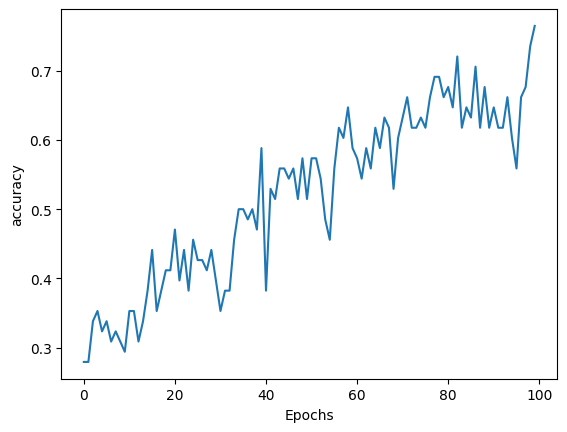

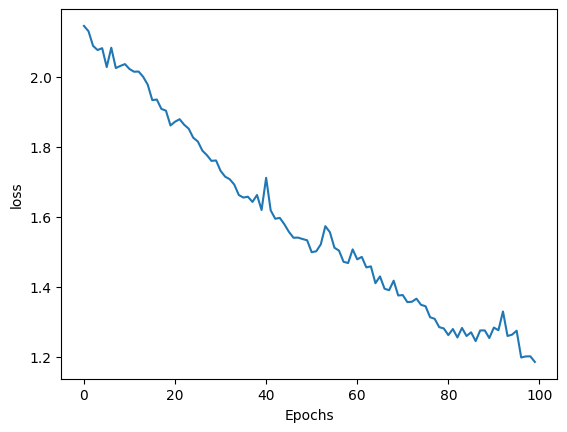

In [6]:
# Modelio treniruotė
history = model.fit(X, y, epochs=100, verbose=1)

# Modelio įvertinimas
def generate_text(seed_text, next_words, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted, axis=1)[0]
        output_word = tokenizer.index_word[predicted_word_index]
        seed_text += " " + output_word
    return seed_text

# Pavyzdys: Generuojame tekstą
seed_text = "Once upon a time"
next_words = 20
print(generate_text(seed_text, next_words, max_sequence_len))

# Pridėkite šį kodą po treniravimo ir generavimo kodo
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')


In [5]:
def generate_text(seed_text, next_words, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted, axis=1)[0]
        output_word = tokenizer.index_word[predicted_word_index]
        seed_text += " " + output_word
    return seed_text

# Pavyzdys: Generuojame tekstą
seed_text = "Once upon a time"
next_words = 20
print(generate_text(seed_text, next_words, max_sequence_len))


Once upon a time a a a a girl girl girl girl hood hood hood forest forest forest forest forest forest forest forest forest


# RNN Modelis Teksto Generavimui

Šio projekto tikslas buvo sukurti rekursinį neuroninį tinklą (RNN), kuris galėtų generuoti tekstą, remdamasis pateiktais duomenimis. Modelis buvo treniruotas naudojant paprastą tekstinį korpusą, kad būtų parodytas principas.

## Duomenų Paruošimas

Duomenys buvo paruošti naudojant `Tokenizer` klasę iš `tensorflow.keras.preprocessing.text` modulio. Tekstas buvo suskaidytas į sekas, kurios buvo naudojamos kaip įėjimo duomenys modelio treniravimui.

## Modelio Architektūra

Modelis susideda iš šių sluoksnių:
- `Embedding` sluoksnis, kuris paverčia žodžius į vektorius.
- `LSTM` sluoksnis, kuris mokosi sekų priklausomybių.
- `Dense` sluoksnis su `softmax` aktyvacija, kuris generuoja tikimybes kitam žodžiui.

Modelis buvo kompiliuotas naudojant `categorical_crossentropy` praradimo funkciją ir `adam` optimizatorių.

## Modelio Treniruotė

Modelis buvo treniruotas 100 epochų. Treniravimo metu mes stebėjome praradimo (loss) ir tikslumo (accuracy) pokyčius.

## Teksto Generavimas

Po modelio treniruotės, mes panaudojome jį tekstui generuoti. Pradinio teksto (seed_text) pagrindu modelis generuoja nurodytą žodžių skaičių.

### Generuoto teksto p


Once upon a time a a a a girl girl girl hood hood hood forest forest forest forest forest forest forest forest forest


## Modelio Treniruotės Rezultatai

Modelis buvo treniruotas 100 epochų, pasiekus tikslumo lygį maždaug 8%. Nors tikslumas nėra labai aukštas, tai yra geras pradinis žingsnis generuojant tekstą su RNN modeliais.

## Tikslumo ir Praradimo Grafikai

Žemiau pateikti tikslumo ir praradimo grafikai treniravimo metu.

```python
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')


## Išvados

Šis projektas parodė, kaip sukurti paprastą RNN modelį tekstui generuoti. Nors modelio tikslumas yra ribotas dėl mažo duomenų kiekio ir paprastos architektūros, šis projektas suteikė gerą supratimą apie rekursinių neuroninių tinklų veikimą ir galimybes.

Tolimesni žingsniai galėtų būti duomenų rinkinio išplėtimas ir modelio architektūros sudėtingumo didinimas, siekiant pagerinti rezultatus.
